In [1]:
%matplotlib inline

import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

import cv2
from scipy.signal import convolve2d

from utils import *
    
resdir = 'res'

In [2]:
mpl.rcParams['figure.figsize'] = (20, 20)
TASK = 1
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

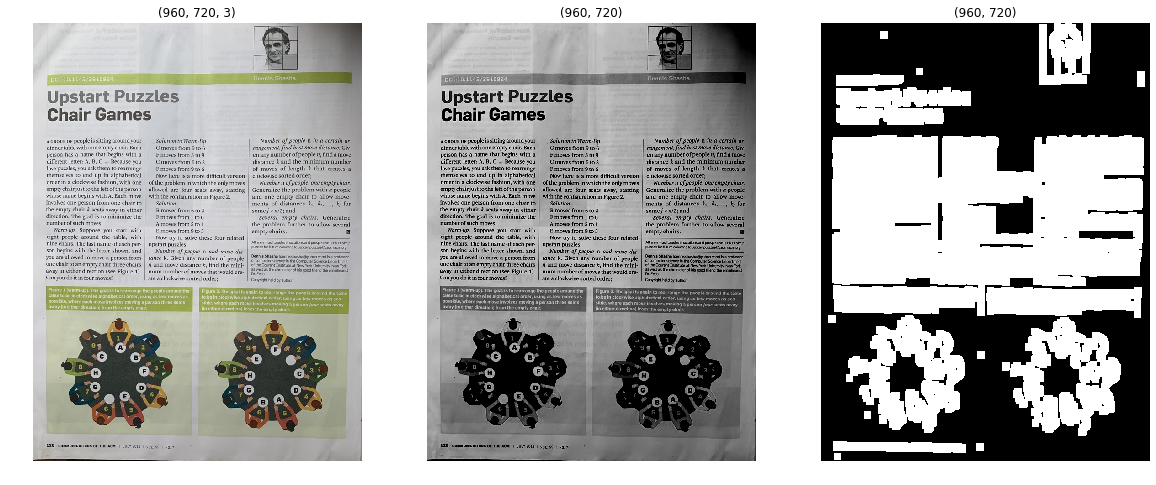

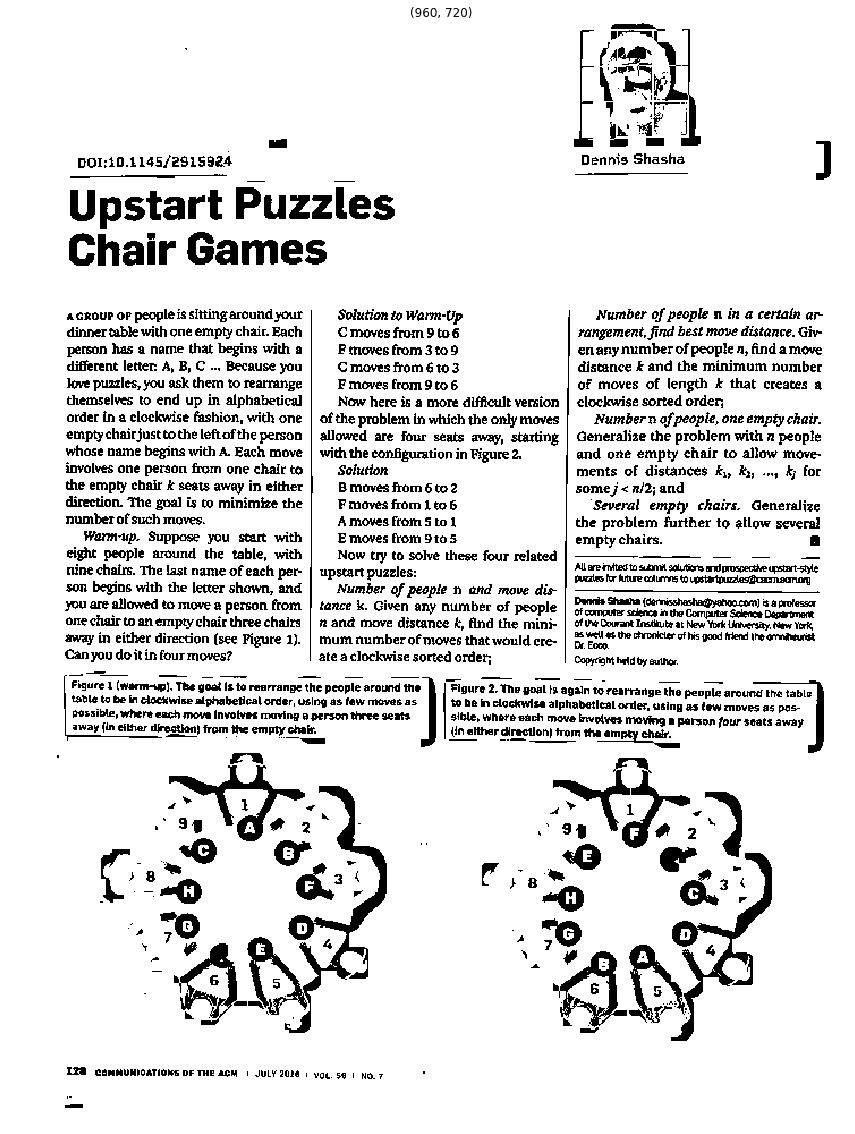

In [3]:
example_id = 1

image, image_gray = get_example(example_id, TASK, brightness_value=-100, clahe=False, clahe2=False,
                                channel=0, show=True)
contours, text_mask = detect_text(image, image_gray, kernel=7, dilate_kernel=6)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 255, 10)

blurred = cv2.GaussianBlur(threshold, (39,39), 7)
blobs = cv2.threshold(blurred, 85, 255, cv2.THRESH_BINARY)[1]
invert_mask = cv2.dilate(255-blobs, np.ones((5,5)), iterations=5).astype(bool)

text_p1 = ((1 - invert_mask) * (255 - threshold)).astype(bool)
text_p2 = (invert_mask * threshold).astype(bool)


text_result = 1 - (text_p1 + text_p2) * text_mask.astype(bool)
imshow(text_result)
save(text_result, TASK, example_id)

---

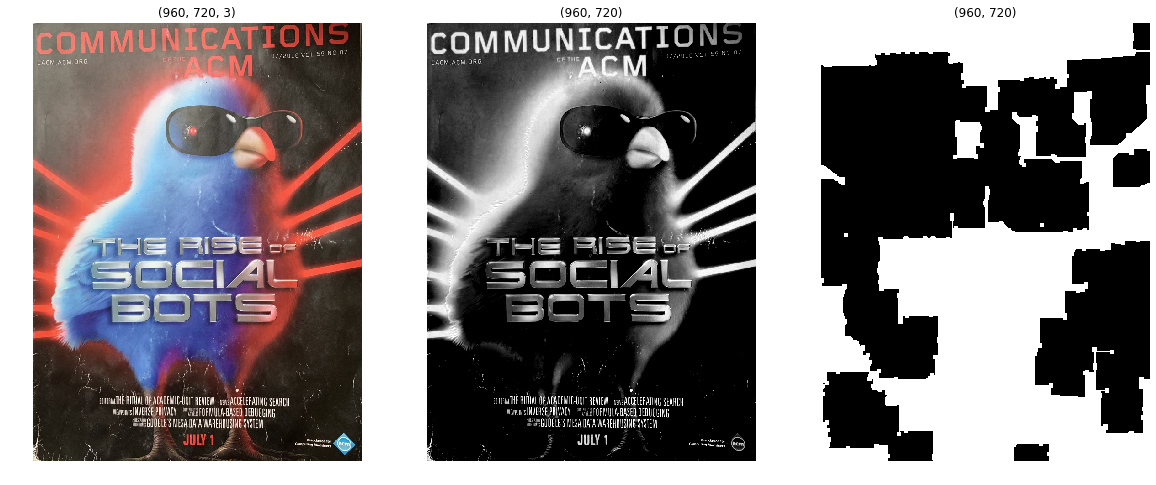

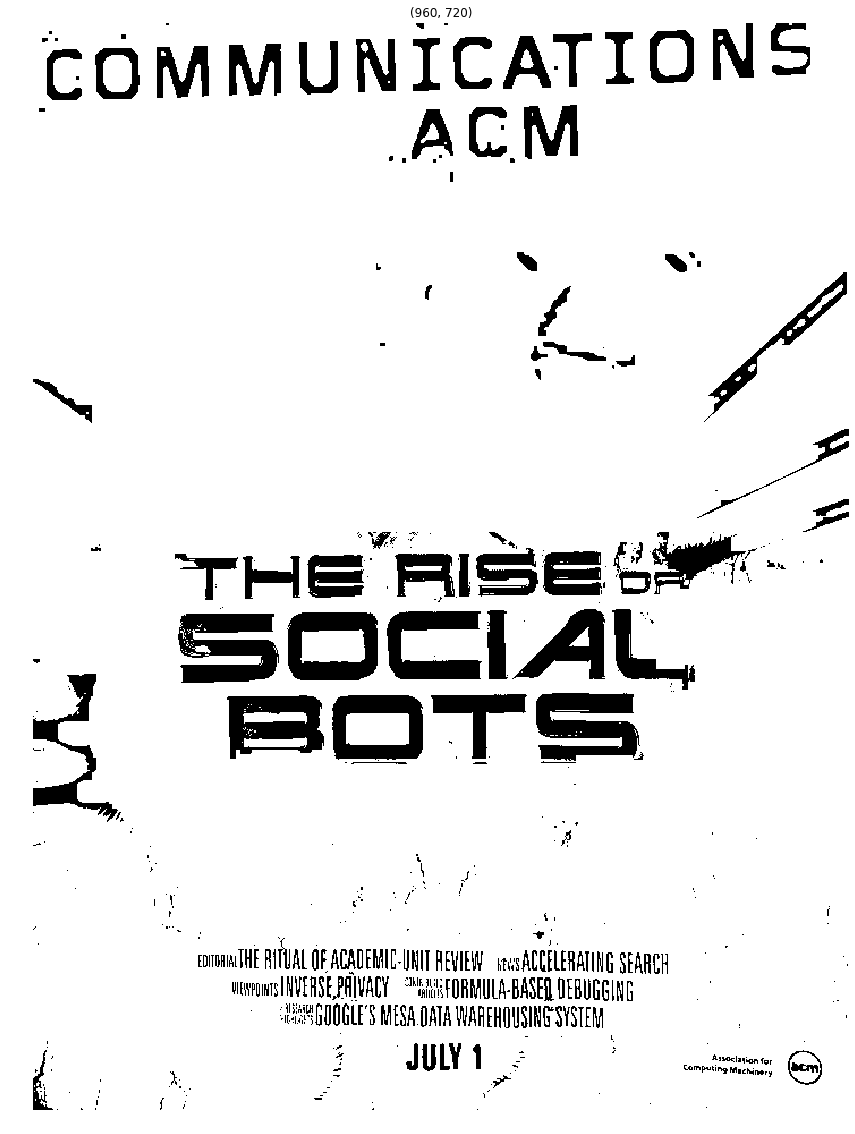

In [427]:
example_id = 2
image, image_gray = get_example(example_id, TASK,
                                brightness_value=-100, channel=0, show=True)
_, text_mask = detect_text(image, image_gray, kernel=11, dilate_kernel=3, dilate_iter=4)
_, text_mask2 = detect_text(image, image_gray, kernel=71, dilate_kernel=1, dilate_iter=1)
text_mask = (text_mask + text_mask2) > 0
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 101, 1)

adaptive_threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 0)
blurred = cv2.GaussianBlur(adaptive_threshold, (3,3), 3) > 254
blurred = dilate(blurred, kernel=5, it=1) * 255
for i in range(2):
    blurred = cv2.GaussianBlur(blurred, (5,5), 4) > 230
    blurred = dilate(blurred, kernel=2, it=2) * 255
top = (blurred>0).astype(np.uint8) * 255

_, bottom = cv2.threshold(image_gray,255,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

top_n = 450
bottom_n = 650

threshold[:top_n] = top[:top_n]
threshold[bottom_n:] = bottom[bottom_n:]
# imshow(threshold)

text = (255 - threshold).astype(bool)

K = 31
CUT = K//2

lines_right = gaussian_kernel(K, np.array([[25,-13],[-13,25]]))
blobs_soft = convolve2d(image_gray, lines_right)[CUT:-CUT,CUT:-CUT]
blobs = cv2.threshold(blobs_soft, 140, 255, cv2.THRESH_BINARY)[1].astype(bool)
blobs = dilate(blobs, kernel=5, it=3)
# imshow(blobs_soft, sub=(1,2,1))
# imshow(blobs, sub=(1,2,2))
# plt.show()
# text_mask = text_mask * (1 - blobs)
text = 1 - (1 - text) * (1 - blobs)

lines_left = gaussian_kernel(K, np.array([[25,13],[13,25]]))
blobs_soft = convolve2d(image_gray, lines_left)[CUT:-CUT,CUT:-CUT]
blobs = cv2.threshold(blobs_soft, 143, 255, cv2.THRESH_BINARY)[1].astype(bool)
blobs = dilate(blobs, kernel=5, it=3)
text = 1 - (1 - text) * (1 - blobs)

blobs_soft = cv2.GaussianBlur(image_gray, (19,19), 29)
blobs = cv2.threshold(blobs_soft, 140, 255, cv2.THRESH_BINARY)[1].astype(bool)
blobs = dilate(blobs, kernel=5, it=3)
text = 1 - (1 - text) * (1 - blobs)

text = 1 - (1 - text) * text_mask


imshow(text)
save(text, TASK, example_id)

---

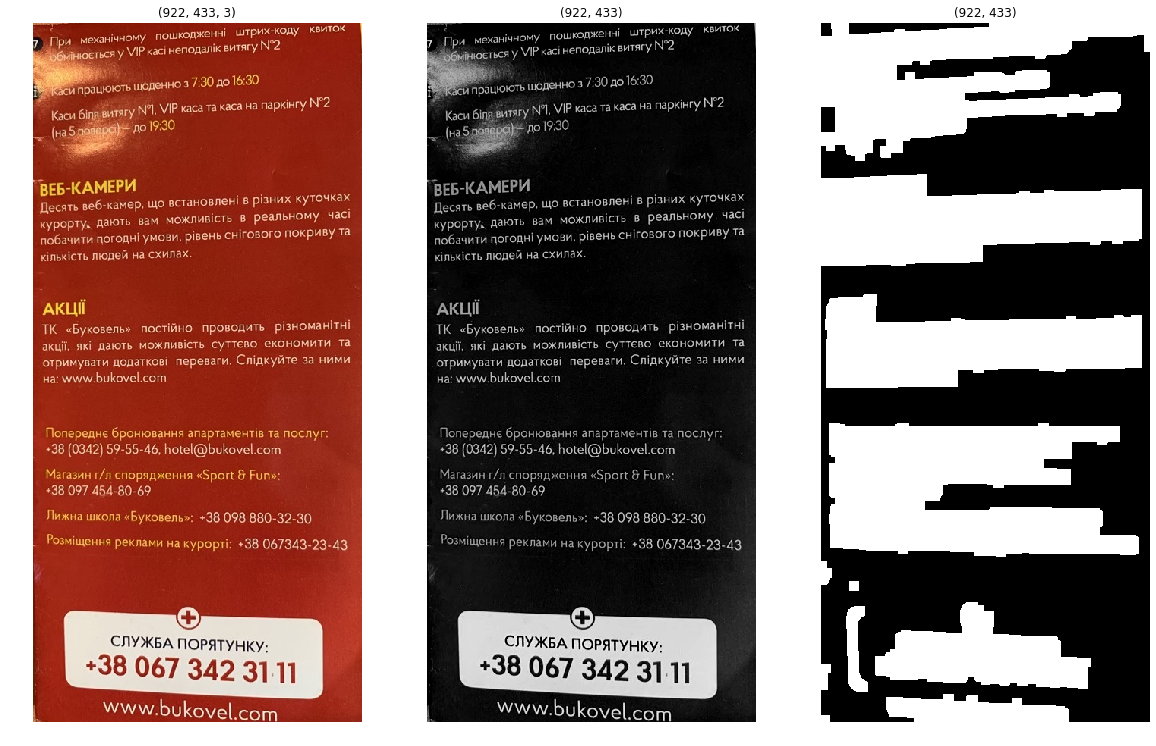

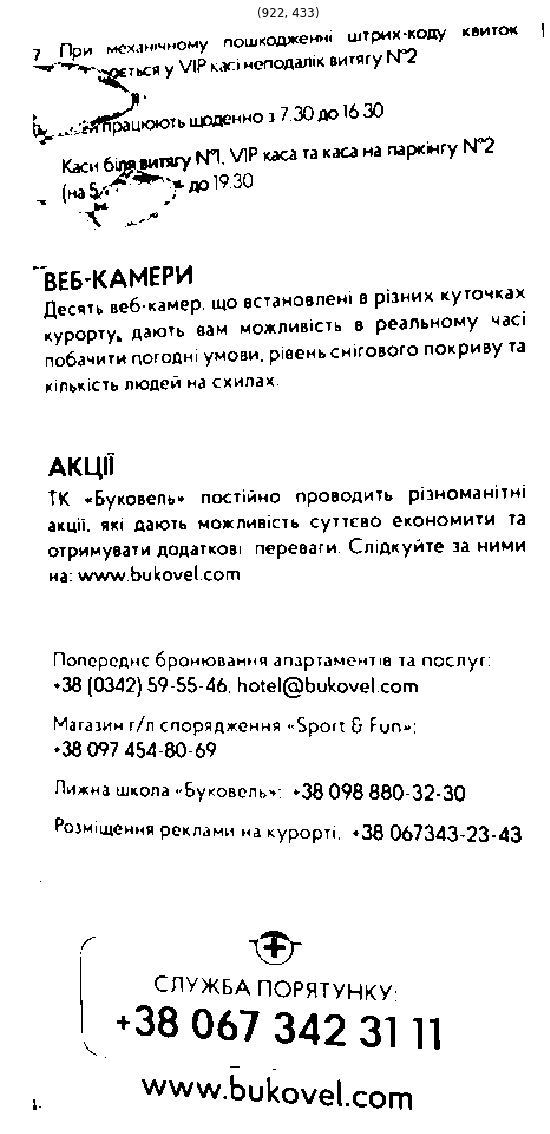

In [428]:
example_id = 3
image, image_gray = get_example(example_id, task=TASK, brightness_value=-60, clahe=False, show=True)
contours, text_mask = detect_text(image, image_gray, kernel=21, dilate_kernel=5)
imshow(text_mask, sub=(1,3,3))
plt.show()

blurred = cv2.GaussianBlur(image_gray, (3,3), 0)
_, threshold = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
blobs_soft = cv2.GaussianBlur(threshold, (39,39), 9)
blobs = cv2.threshold(blobs_soft, 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1].astype(bool)

threshold = threshold.astype(bool)
text_result = threshold * blobs + (1 - threshold) * (1 - blobs)
text_result = 1 - text_mask * (1 - text_result)
imshow(text_result)
save(text_result, TASK, example_id)

---

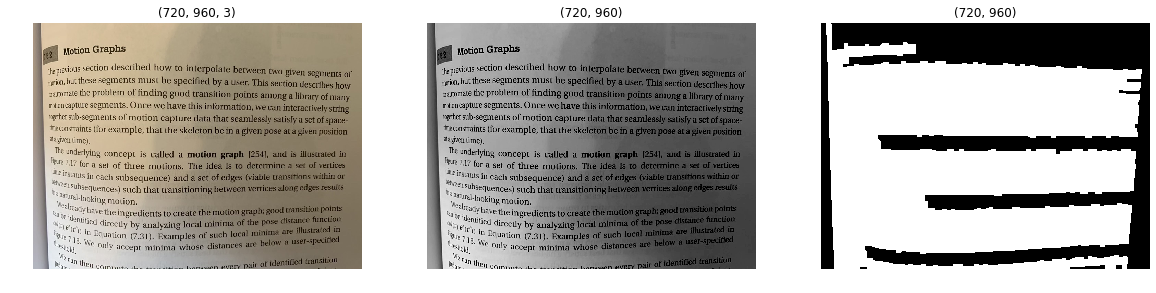

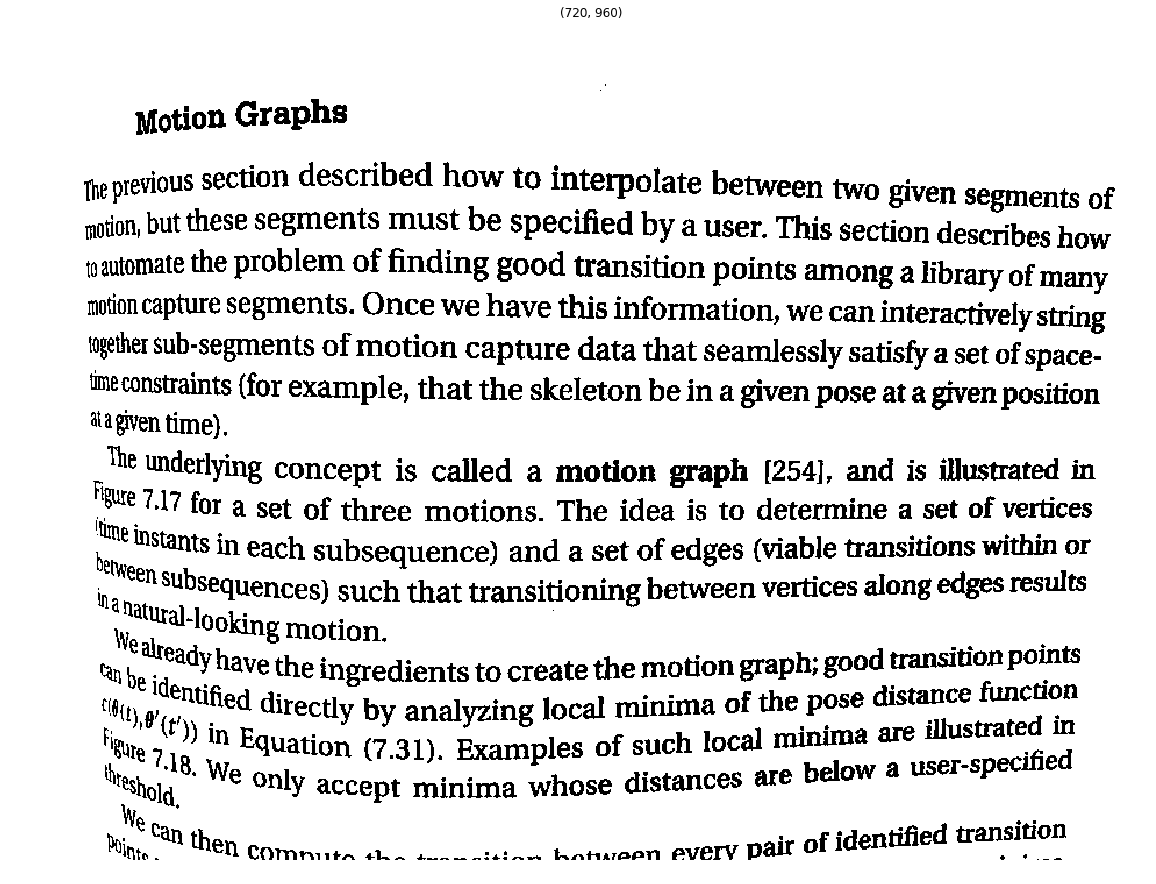

In [429]:
example_id = 4
image, image_gray = get_example(example_id, task=TASK, brightness_value=-60, clahe=False, show=True)
contours, text_mask = detect_text(image, image_gray, kernel=21, dilate_kernel=5)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 255, 10)

blurred = cv2.GaussianBlur(threshold, (39,39), 0)
blobs = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
blobs = 255 - blobs
blobs = cv2.dilate(blobs, np.ones((7,7)), iterations=3).astype(bool)
blobs = 1 - blobs
text_result = 1 - (1 - threshold.astype(bool)) * blobs
imshow(text_result)
save(text_result, TASK, example_id)

---

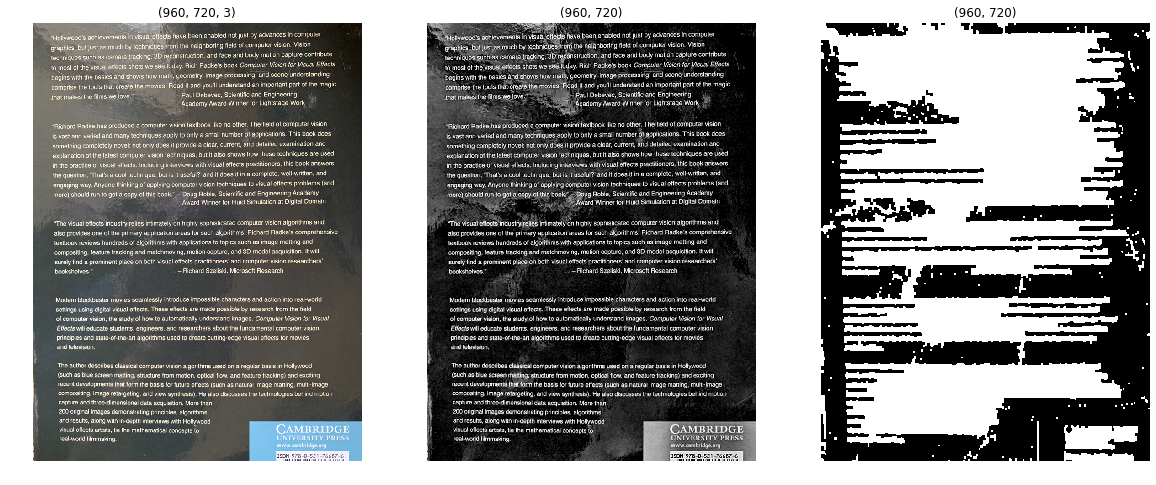

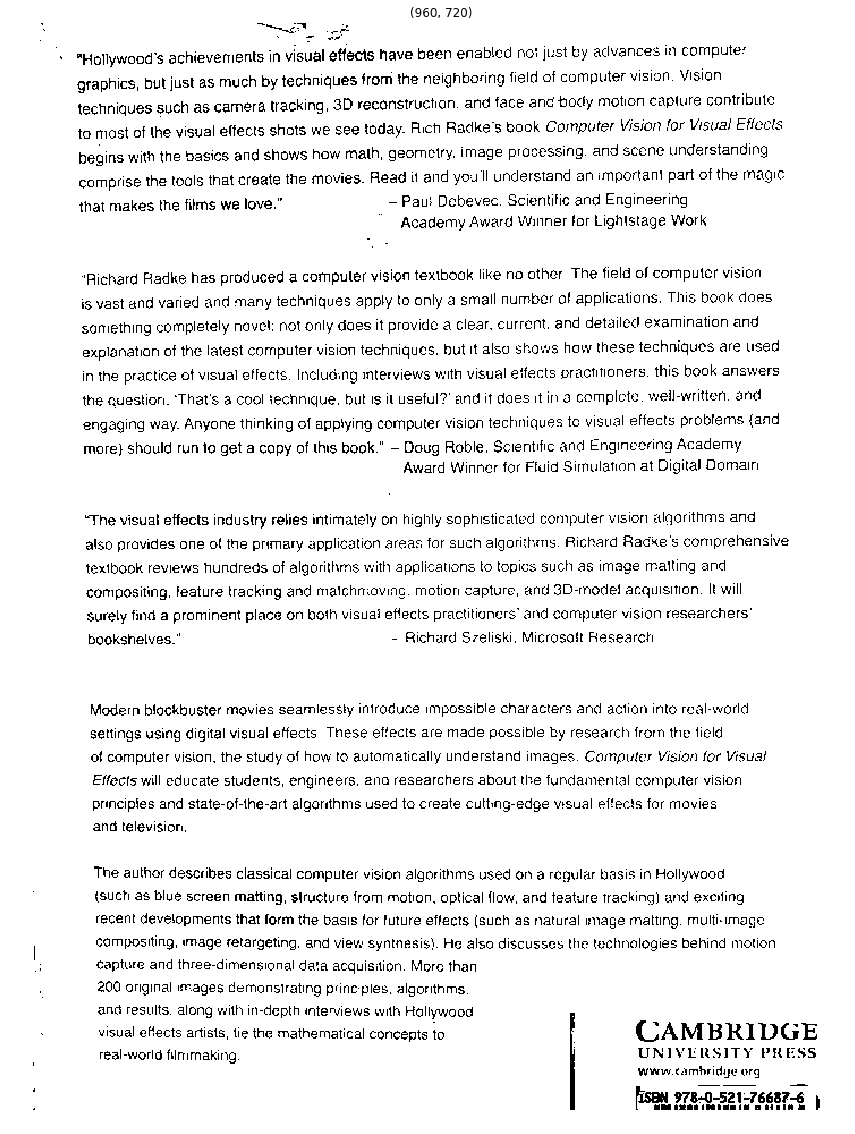

In [430]:
example_id = 5

image, image_gray = get_example(example_id, TASK, brightness_value=-60,
                                clahe2=True, show=True)
contours, text_mask = detect_text(image, image_gray, kernel=9, dilate_kernel=2)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.threshold(image_gray, 135, 255, cv2.THRESH_BINARY)[1]
text_result = 1 - threshold.astype(bool)
text_result = 1 - text_mask * (1 - text_result)

blurred = cv2.GaussianBlur(threshold, (29,29), 17)
blobs = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)[1]
blobs = cv2.dilate(blobs, np.ones((3,3)), iterations=3)
lower_text = 1 - blobs * image_gray
lower_text = cv2.threshold(lower_text, 150, 255, cv2.THRESH_BINARY)[1]
upper_text = text_result * (1 - blobs.astype(bool))
text_result = lower_text.astype(bool) + upper_text.astype(bool)

imshow(text_result)
save(text_result, TASK, example_id)

---

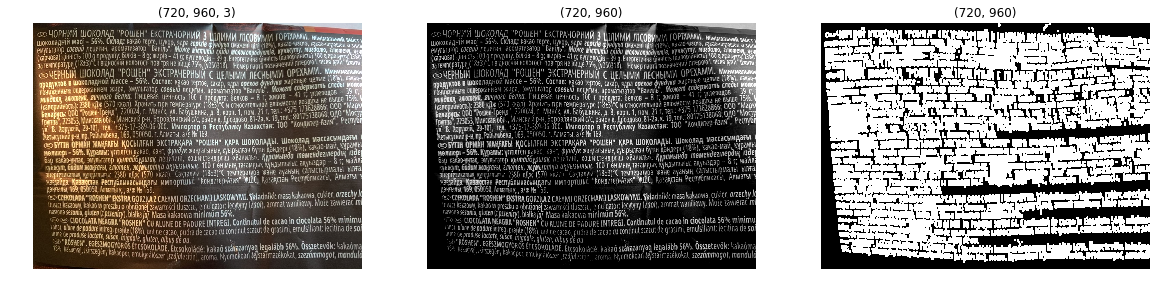

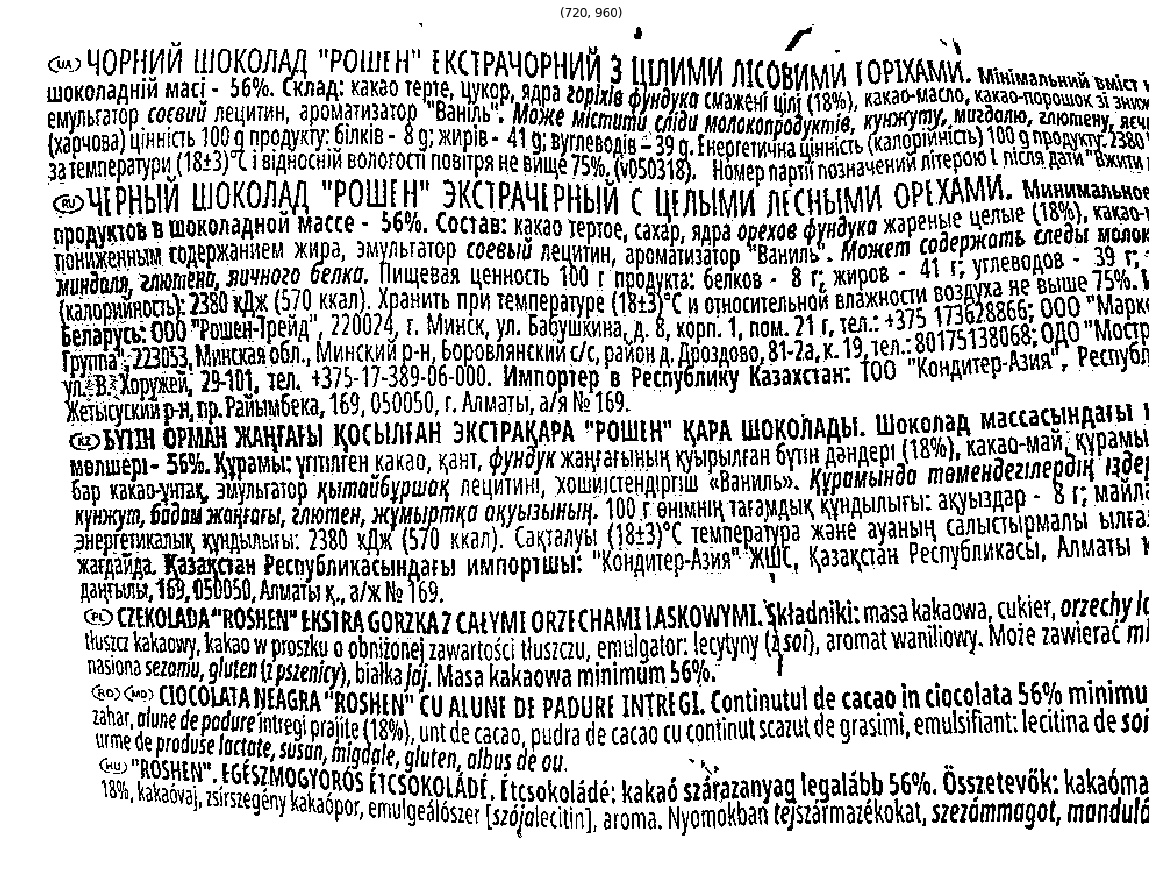

In [431]:
example_id = 6
image, image_gray = get_example(example_id, TASK, brightness_value=-60, clahe=False)
contours, text_mask = detect_text(image, image_gray, kernel=4, dilate_kernel=3, dilate_iter=2)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 15, 0)
text_result = 1 - threshold.astype(bool)
text_result = 1 - text_mask * (1 - text_result)
imshow(text_result)
save(text_result, TASK, example_id)